In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
import utils

In [2]:
import yaml

# Import general configs:
with open("config.yml", "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)

sns.set(**cfg["general_plotting"])

### Import data

In [4]:
data_raw_emi = pd.read_table("data/migr_emi2_tabular.tsv")
display(data_raw_emi.head())

data_raw_imm = pd.read_table("data/migr_imm8_tabular.tsv")
display(data_raw_imm.head())

# data_raw_pop = pd.read_table("data/urb_esms_an_4.tsv")
# display(data_raw_imm.head())

,"freq,age,agedef,unit,sex,geo\TIME_PERIOD",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,TOTAL,COMPLET,NR,F,AT",:,:,:,:,:,:,27782,29220,27736,...,23623,23360,24746,28284,28364,28381,28842,26795,28792,33347
1,"A,TOTAL,COMPLET,NR,F,BE",16059,16701,16493,20590,17823,17724,18172,19270,31177,...,42557,40814,38673,39873,39331,38464,41839,33549,37335,36478
2,"A,TOTAL,COMPLET,NR,F,BG",:,:,:,:,:,:,:,:,:,...,9837 p,12980 p,14110 p,15177,15540 p,16154 p,19400 p,2855 p,13818,4697
3,"A,TOTAL,COMPLET,NR,F,CH",46218,48728,54906,50693,47994,47906,49431,47429,45438,...,47820,49970,52587,54654,56180,58235,56575,49161,52288,54360
4,"A,TOTAL,COMPLET,NR,F,CY",:,:,:,:,:,:,:,:,:,...,13317,13533,9788,8340,8353,8692,10222,10728,9242,10564


,"freq,agedef,age,unit,sex,geo\TIME_PERIOD",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,COMPLET,TOTAL,NR,F,AT",:,:,:,:,:,:,32883,32392,33793,...,47432,52494,69345,59191,52863,49456,50613,47156,50392,102165
1,"A,COMPLET,TOTAL,NR,F,BE",29563,31406,31583,30297,32834,31610,30882,29363,38156,...,57203,57681,63217,57056,58613,63164,67947,54220,62991,100703
2,"A,COMPLET,TOTAL,NR,F,BG",:,:,:,:,:,:,:,:,:,...,8074 p,11903 p,11730,10300,13126 p,14973 p,18840 p,17923 p,17702,18086
3,"A,COMPLET,TOTAL,NR,F,CH",72508,77819,75641,71620,64892,58066,48649,46220,47858,...,76841,75173,73714,71356,68334,68991,68757,65434,68246,77086
4,"A,COMPLET,TOTAL,NR,F,CY",:,:,:,:,:,:,:,:,:,...,6675,6448,8688,8829,11316,12209,13936,13847,12849,17016


### Preprocess data

In [5]:
# Clean 'emigration' dataset:
df_emi = utils.preprocess.preprocess_data(data_raw_emi)
df_emi["data"] = "emigration"
df_emi.head()

NameError: name 'np' is not defined

In [6]:
# Clean 'immigration' dataset:
df_imm = utils.preprocess.preprocess_data(data_raw_imm)
df_imm["data"] = "immigration"
df_imm.head()

,freq,agedef,age,unit,sex,geo\TIME_PERIOD,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,data
0,A,COMPLET,TOTAL,NR,F,AT,NaN,NaN,NaN,NaN,...,52494.0,69345.0,59191.0,52863.0,49456.0,50613.0,47156.0,50392.0,102165.0,immigration
1,A,COMPLET,TOTAL,NR,F,BE,29563.0,31406.0,31583.0,30297.0,...,57681.0,63217.0,57056.0,58613.0,63164.0,67947.0,54220.0,62991.0,100703.0,immigration
2,A,COMPLET,TOTAL,NR,F,BG,NaN,NaN,NaN,NaN,...,11903.0,11730.0,10300.0,13126.0,14973.0,18840.0,17923.0,17702.0,18086.0,immigration
3,A,COMPLET,TOTAL,NR,F,CH,72508.0,77819.0,75641.0,71620.0,...,75173.0,73714.0,71356.0,68334.0,68991.0,68757.0,65434.0,68246.0,77086.0,immigration
4,A,COMPLET,TOTAL,NR,F,CY,NaN,NaN,NaN,NaN,...,6448.0,8688.0,8829.0,11316.0,12209.0,13936.0,13847.0,12849.0,17016.0,immigration


In [33]:
# Join two datasets:
df_migr = pd.concat([df_emi, df_imm])
df_migr.rename(columns={"geo\TIME_PERIOD": "country"}, inplace=True)
df_migr

,freq,age,agedef,unit,sex,country,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,data
0,A,TOTAL,COMPLET,NR,F,AT,NaN,NaN,NaN,NaN,...,23360.0,24746.0,28284.0,28364.0,28381.0,28842.0,26795.0,28792.0,33347.0,emigration
1,A,TOTAL,COMPLET,NR,F,BE,16059.0,16701.0,16493.0,20590.0,...,40814.0,38673.0,39873.0,39331.0,38464.0,41839.0,33549.0,37335.0,36478.0,emigration
2,A,TOTAL,COMPLET,NR,F,BG,NaN,NaN,NaN,NaN,...,12980.0,14110.0,15177.0,15540.0,16154.0,19400.0,2855.0,13818.0,4697.0,emigration
3,A,TOTAL,COMPLET,NR,F,CH,46218.0,48728.0,54906.0,50693.0,...,49970.0,52587.0,54654.0,56180.0,58235.0,56575.0,49161.0,52288.0,54360.0,emigration
4,A,TOTAL,COMPLET,NR,F,CY,NaN,NaN,NaN,NaN,...,13533.0,9788.0,8340.0,8353.0,8692.0,10222.0,10728.0,9242.0,10564.0,emigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18286,A,Y_LT1,REACH,NR,T,NO,NaN,NaN,NaN,NaN,...,588.0,573.0,644.0,528.0,450.0,455.0,277.0,274.0,441.0,immigration
18287,A,Y_LT1,REACH,NR,T,PL,NaN,NaN,NaN,NaN,...,1734.0,2565.0,2836.0,4363.0,4877.0,3913.0,1959.0,1456.0,1325.0,immigration
18288,A,Y_LT1,REACH,NR,T,PT,NaN,NaN,NaN,NaN,...,170.0,314.0,302.0,376.0,321.0,656.0,528.0,599.0,399.0,immigration
18289,A,Y_LT1,REACH,NR,T,SE,NaN,NaN,NaN,NaN,...,1350.0,1391.0,1992.0,1574.0,1318.0,1163.0,873.0,697.0,784.0,immigration


### Select relevant subset of the data

In [34]:
df = df_migr.loc[  (df_migr["age"]=="TOTAL")       # all age groups
                 & (df_migr["agedef"]=="COMPLET")  
                 & (df_migr["sex"]=="T")]          # both M and F
df

,freq,age,agedef,unit,sex,country,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,data
76,A,TOTAL,COMPLET,NR,T,AT,NaN,NaN,NaN,NaN,...,53491.0,56689.0,64428.0,66144.0,67212.0,68280.0,62581.0,67299.0,74271.0,emigration
77,A,TOTAL,COMPLET,NR,T,BE,32502.0,33752.0,33707.0,44811.0,...,94573.0,89794.0,92471.0,89690.0,88935.0,102936.0,76562.0,87272.0,84627.0,emigration
78,A,TOTAL,COMPLET,NR,T,BG,NaN,NaN,NaN,NaN,...,28727.0,29470.0,30570.0,31586.0,33225.0,39941.0,6649.0,26755.0,13175.0,emigration
79,A,TOTAL,COMPLET,NR,T,CH,97601.0,103333.0,117034.0,105025.0,...,111103.0,116631.0,120653.0,124997.0,130225.0,126221.0,109376.0,116769.0,122123.0,emigration
80,A,TOTAL,COMPLET,NR,T,CY,NaN,NaN,NaN,NaN,...,24038.0,17183.0,14892.0,15105.0,15340.0,17373.0,21368.0,18410.0,17958.0,emigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,A,TOTAL,COMPLET,NR,T,SE,60048.0,49731.0,45348.0,61872.0,...,126966.0,134240.0,163005.0,144489.0,132602.0,115805.0,82518.0,90631.0,102436.0,immigration
107,A,TOTAL,COMPLET,NR,T,SI,7075.0,5989.0,3461.0,2745.0,...,13846.0,15420.0,16623.0,18808.0,28455.0,31319.0,36110.0,23624.0,35613.0,immigration
108,A,TOTAL,COMPLET,NR,T,SK,944.0,1752.0,2106.0,9106.0,...,5357.0,6997.0,7686.0,7188.0,7253.0,7016.0,6775.0,5733.0,5463.0,immigration
109,A,TOTAL,COMPLET,NR,T,TR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494052.0,immigration


In [9]:
# Ensure selecting only considering the desired data:
for col in df.columns[0:6]:
    print(f"{col}: {df[col].unique()}")

freq: ['A']
age: ['TOTAL']
agedef: ['COMPLET']
unit: ['NR']
sex: ['T']
country: ['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'EU27_2020' 'FI'
 'FR' 'GE' 'HR' 'HU' 'IE' 'IS' 'IT' 'LI' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT'
 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK' 'TR' 'UA' 'UK']


In [10]:
# Final cleaning of dataset:
# ... remove unnecessary columns
cols_to_drop = ["freq", "age", "agedef", "unit", "sex"]
df.drop(cols_to_drop, axis=1, inplace=True)

# ... remove countries with a lot of missing data
countries_to_drop = ["EU27_2020", "ME", "UA", "GE", "TR"]
df = df.loc[ ~df["country"].isin(countries_to_drop) ]

df.head()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8772\665035635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cols_to_drop, axis=1, inplace=True)


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,data
76,AT,NaN,NaN,NaN,NaN,NaN,NaN,66050.0,68585.0,64272.0,...,53491.0,56689.0,64428.0,66144.0,67212.0,68280.0,62581.0,67299.0,74271.0,emigration
77,BE,32502.0,33752.0,33707.0,44811.0,36530.0,36044.0,36674.0,39320.0,72087.0,...,94573.0,89794.0,92471.0,89690.0,88935.0,102936.0,76562.0,87272.0,84627.0,emigration
78,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28727.0,29470.0,30570.0,31586.0,33225.0,39941.0,6649.0,26755.0,13175.0,emigration
79,CH,97601.0,103333.0,117034.0,105025.0,99305.0,99509.0,103398.0,98521.0,94778.0,...,111103.0,116631.0,120653.0,124997.0,130225.0,126221.0,109376.0,116769.0,122123.0,emigration
80,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24038.0,17183.0,14892.0,15105.0,15340.0,17373.0,21368.0,18410.0,17958.0,emigration


In [11]:
# Recast the dataframe for easier handling:
df_h = df.melt(id_vars=["data", "country"], var_name="year")
df_h = df_h.pivot_table(index=["country", "year"], columns="data", values="value").reset_index()
df_h

data,country,year,emigration,immigration
0,AT,1996,66050.0,69930.0
1,AT,1997,68585.0,70122.0
2,AT,1998,64272.0,72723.0
3,AT,1999,66923.0,86710.0
4,AT,2000,64472.0,81676.0
...,...,...,...,...
927,UK,2015,299183.0,631452.0
928,UK,2016,340440.0,588993.0
929,UK,2017,359665.0,644209.0
930,UK,2018,344347.0,603953.0


In [12]:
# Calculate net:
df_h["net"] = df_h["immigration"] - df_h["emigration"]
df_h.head()

data,country,year,emigration,immigration,net
0,AT,1996,66050.0,69930.0,3880.0
1,AT,1997,68585.0,70122.0,1537.0
2,AT,1998,64272.0,72723.0,8451.0
3,AT,1999,66923.0,86710.0,19787.0
4,AT,2000,64472.0,81676.0,17204.0


### Absolute values of migration

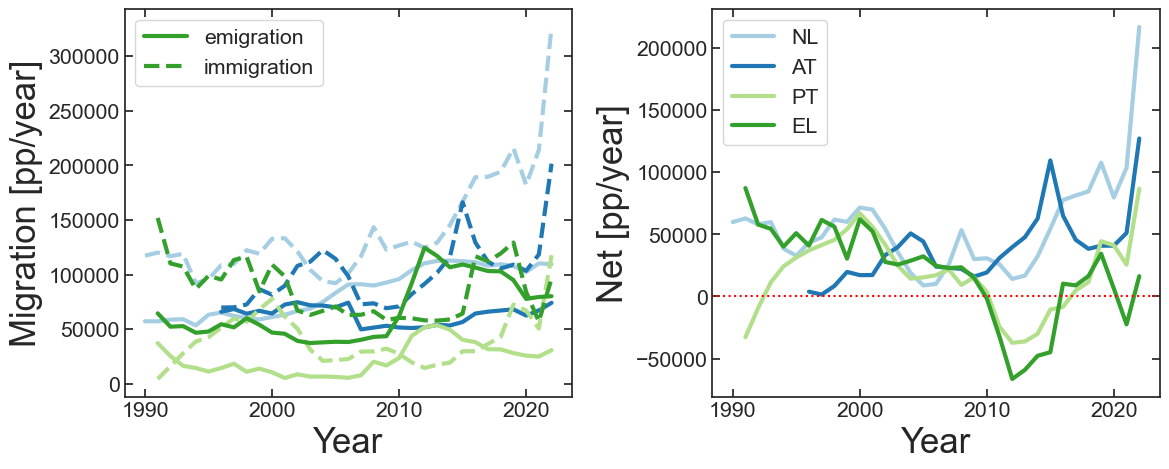

In [31]:
countries_to_inspect = ["NL", "AT", "PT", "EL"]
###########################################

f, ax = plt.subplots(1, 2, figsize=(12, 5))

for country in countries_to_inspect:
    
    params = {"data": df_h.loc[df_h.country == country],
              "x": "year",
              "linewidth": 3}

    sns.lineplot(y="emigration", ax=ax[0], label="emigration", **params)
    color = ax[0].get_lines()[-1].get_color()   # use same color 
    sns.lineplot(y="immigration", ax=ax[0], linestyle="--", color=color, label="immigration", **params)
    sns.lineplot(y="net", ax=ax[1], color=color, label=country, **params)

# Reference line:
ax[1].axhline(0, color="red", linestyle=":")

# Display only last 2 entries of the legend:
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:])

# Other settings:
ax[1].legend()
ax[0].set_ylabel("Migration [pp/year]")
ax[1].set_ylabel("Net [pp/year]")
for ax_ in ax:
    ax_.set_xlabel("Year")
    
plt.tight_layout()
plt.show()

### How do the temporal trends of emigration compare across countries?

In [35]:
# Recast dataframe with countries on columns:
df_im_helper = df_h.pivot_table(index=["year"], columns="country", values="emigration")
display(df_im_helper.head())

# Apply a z-score normalization (values centered around 0, stdev 1):
df_im_norm = df_im_helper.apply(lambda x: (x - x.mean())/x.std())
df_im_norm.head()

country,AT,BE,BG,CH,CY,CZ,DE,DK,EE,EL,...,MT,NL,NO,PL,PT,RO,SE,SI,SK,UK
year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,32502.0,NaN,97601.0,NaN,NaN,610595.0,32383.0,NaN,NaN,...,NaN,57344.0,23784.0,18440.0,NaN,NaN,25196.0,4908.0,867.0,NaN
1991,NaN,33752.0,NaN,103333.0,NaN,NaN,596455.0,32629.0,NaN,64628.0,...,NaN,57328.0,18238.0,20977.0,37336.0,NaN,24745.0,9060.0,527.0,NaN
1992,NaN,33707.0,NaN,117034.0,NaN,NaN,720127.0,31915.0,NaN,52389.0,...,NaN,58834.0,16801.0,18115.0,25559.0,NaN,25726.0,3848.0,128.0,NaN
1993,NaN,44811.0,NaN,105025.0,NaN,NaN,815312.0,32344.0,NaN,52929.0,...,NaN,59222.0,18903.0,21376.0,16566.0,NaN,29874.0,1390.0,7355.0,NaN
1994,NaN,36530.0,NaN,99305.0,NaN,NaN,767555.0,34710.0,9063.0,46813.0,...,NaN,53579.0,19475.0,25904.0,14552.0,NaN,32661.0,983.0,154.0,NaN


country,AT,BE,BG,CH,CY,CZ,DE,DK,EE,EL,...,MT,NL,NO,PL,PT,RO,SE,SI,SK,UK
year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,-1.735019,NaN,-0.224366,NaN,NaN,0.267314,-1.324601,NaN,NaN,...,NaN,-1.223856,-0.009594,-0.880592,NaN,NaN,-1.792565,-0.928178,-0.738269,NaN
1991,NaN,-1.680851,NaN,0.158512,NaN,NaN,0.183803,-1.295925,NaN,-0.098271,...,NaN,-1.224577,-1.091970,-0.856548,0.990808,NaN,-1.844392,-0.236632,-0.955077,NaN
1992,NaN,-1.682801,NaN,1.073693,NaN,NaN,0.914204,-1.379156,NaN,-0.539439,...,NaN,-1.156712,-1.372420,-0.883672,0.180248,NaN,-1.731660,-1.104729,-1.209508,NaN
1993,NaN,-1.201622,NaN,0.271532,NaN,NaN,1.476362,-1.329147,NaN,-0.519974,...,NaN,-1.139228,-0.962187,-0.852767,-0.438701,NaN,-1.254991,-1.514127,3.398942,NaN
1994,NaN,-1.560470,NaN,-0.110544,NaN,NaN,1.194311,-1.053341,0.588629,-0.740432,...,NaN,-1.393519,-0.850553,-0.809854,-0.577316,NaN,-0.934722,-1.581916,-1.192928,NaN


In [40]:
# Compute correlation coefficients between countries:
df_corr = df_im_norm.corr(method="pearson")
df_corr.head()

country,AT,BE,BG,CH,CY,CZ,DE,DK,EE,EL,...,MT,NL,NO,PL,PT,RO,SE,SI,SK,UK
country,,,,,,,,,,,,,,,,,,,,,
AT,1.000000,-0.212946,0.362535,-0.069586,-0.225496,-0.302333,0.627578,0.360301,-0.025889,-0.355495,...,0.662377,-0.412818,0.267239,-0.493590,-0.534870,0.132176,-0.536943,-0.318099,-0.104089,-0.265928
BE,-0.212946,1.000000,0.467051,0.138031,0.538682,0.017280,-0.535338,0.727228,0.166214,0.507756,...,-0.150860,0.785198,0.585656,0.624541,0.313813,-0.031760,0.773812,0.688634,0.453417,0.556196
BG,0.362535,0.467051,1.000000,0.767828,0.217067,0.360145,0.017280,0.373305,0.481129,0.560105,...,0.000364,0.641103,0.419135,0.433780,0.298759,0.610535,-0.018167,-0.194862,0.558449,0.583503
CH,-0.069586,0.138031,0.767828,1.000000,0.795084,0.006018,-0.209315,0.482952,0.845187,0.748080,...,0.688978,0.526946,0.472835,0.570452,0.641217,-0.167986,0.397426,0.427846,0.499334,0.208778
CY,-0.225496,0.538682,0.217067,0.795084,1.000000,-0.144896,-0.381160,0.409838,0.645060,0.842101,...,0.502686,0.838505,0.524630,0.720387,0.793010,-0.473747,0.723629,0.556433,0.761940,-0.052249


In [56]:
32-27

5

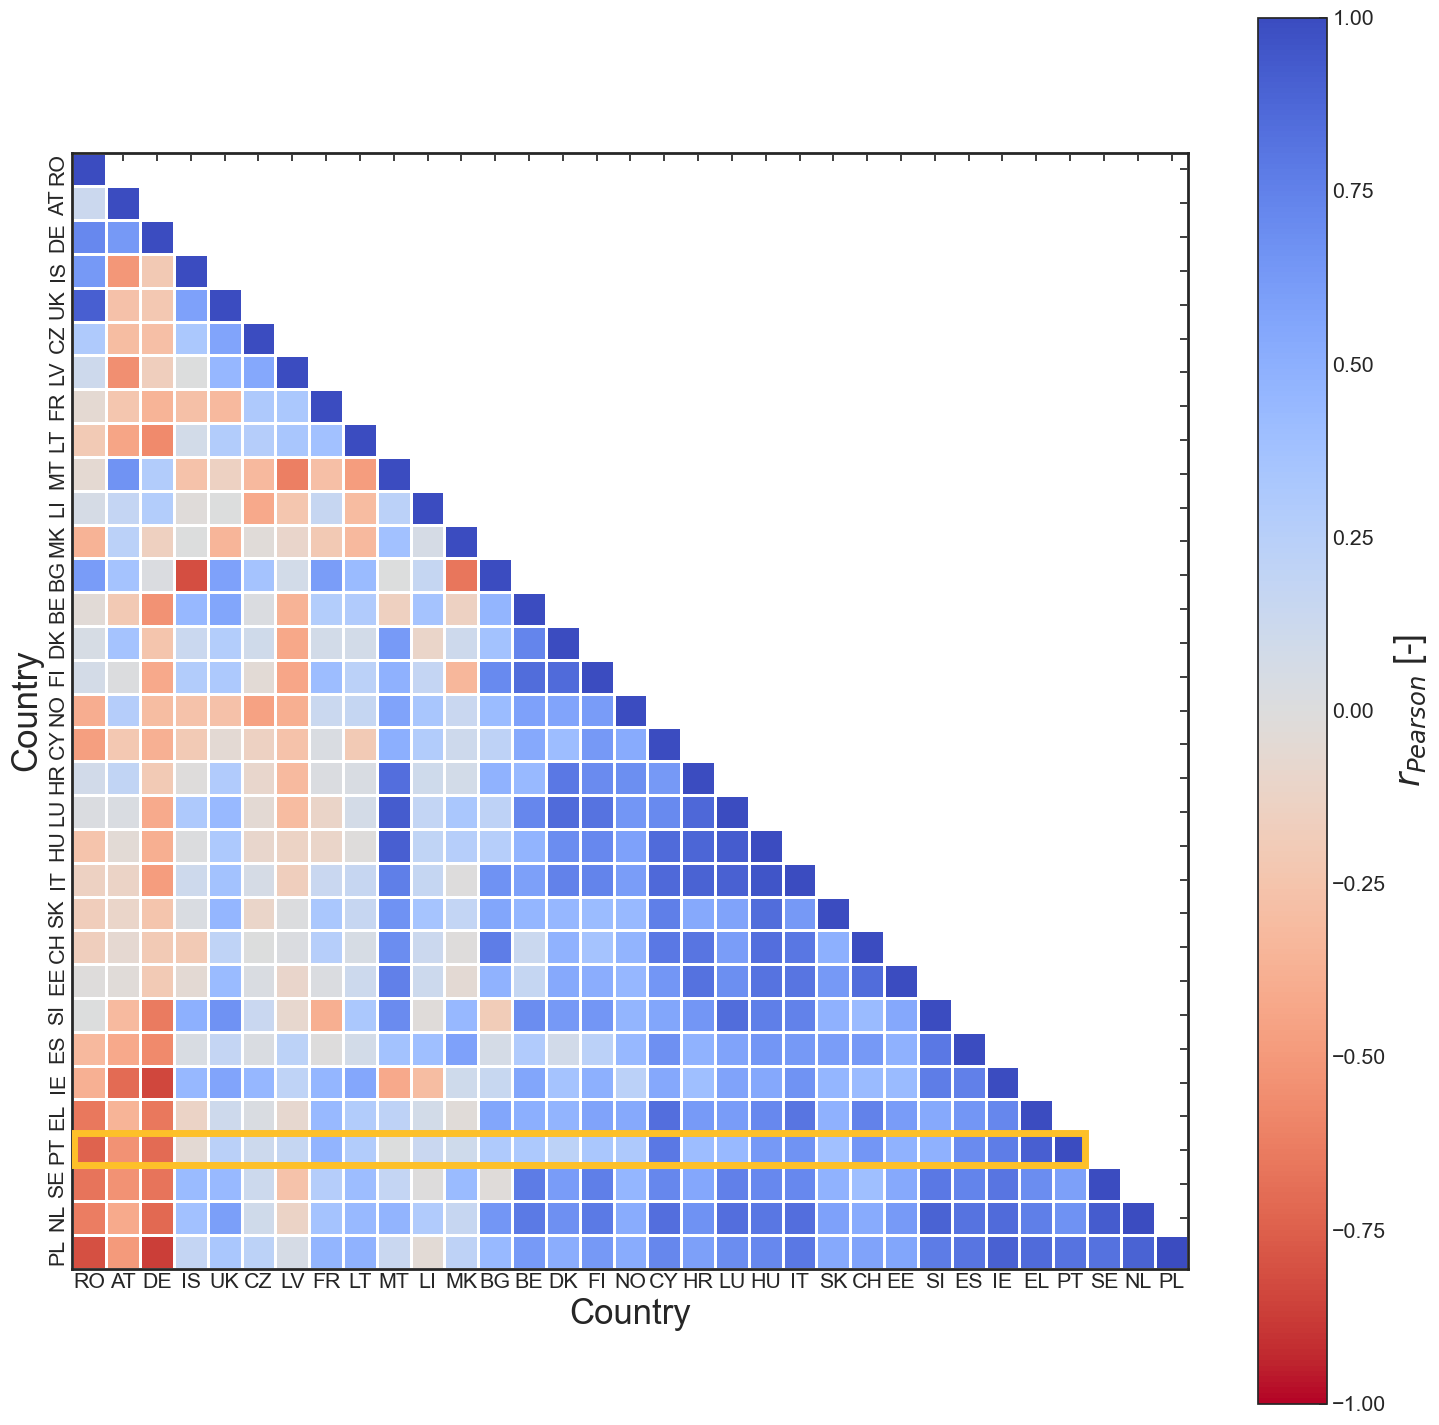

In [92]:
# Compute the linkage matrix
linkage_matrix = linkage(df_corr,
                         method="average",
                         metric="euclidean")

# Reorder the DataFrame based on the clustering
ordered_indices = leaves_list(linkage_matrix)
df_reordered = df_corr.iloc[ordered_indices, ordered_indices]

# Create a mask for the upper triangle
mask = np.triu(np.ones(df_reordered.shape), k=1)


# Display heatmap:
f, ax = plt.subplots(figsize=(18,18))

g = sns.heatmap(df_reordered, mask=mask,
                cbar=False,
                cmap="coolwarm_r",
                linewidths=2,
                square=True,
                vmin=-1, vmax=1,
                ax=ax)

# Add frame around heatmap:
for _, spine in g.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)
    
# Add colorbar:
g.figure.colorbar(ax.collections[0],
                  label=r"$r_{Pearson}$ [-]",)  


# Add rectangle highlighting "PT":
utils.plotter.add_rectangle(ax=ax, df=df_reordered, country="PT")


ax.set_xlabel("Country")
ax.set_ylabel("Country")
plt.show()

##### Focusing on Portugal

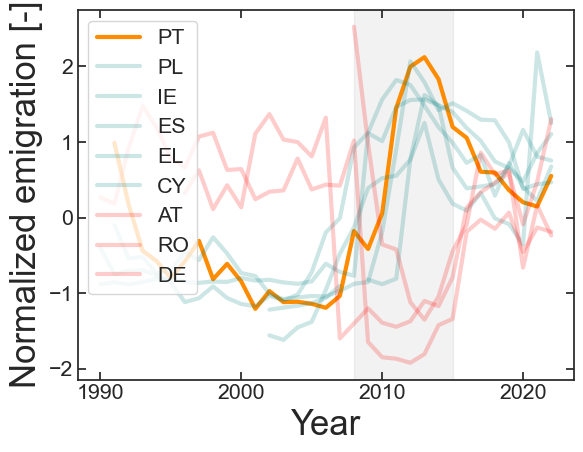

In [18]:
ax = utils.plotter.plot_trends(df_im_norm, df_corr, ref_country="PT", other_countries=["PL", "IE", "ES", "EL", "CY", "AT", "RO", "DE"])
ax.axvspan(2008, 2015, color="gray", alpha=0.1, zorder=0)
plt.show()

### How did the spike in emigration around 2010 affect the overall migration balance in the countries?

In [6]:
countries_to_inspect = ["PT", "PL", "IE",  "EL", "CY"]   # "ES",

df_crisis = df_h.loc[  (df_h.country.isin(countries_to_inspect))
                     & (df_h.year >= 2008) 
                     & (df_h.year <= 2016)
                     ]
df_crisis.head()

NameError: name 'df_h' is not defined

In [7]:
df_crisis["cumulative"] = df_crisis.groupby("country")["net"].transform(lambda x: x.cumsum())
df_crisis

NameError: name 'df_crisis' is not defined

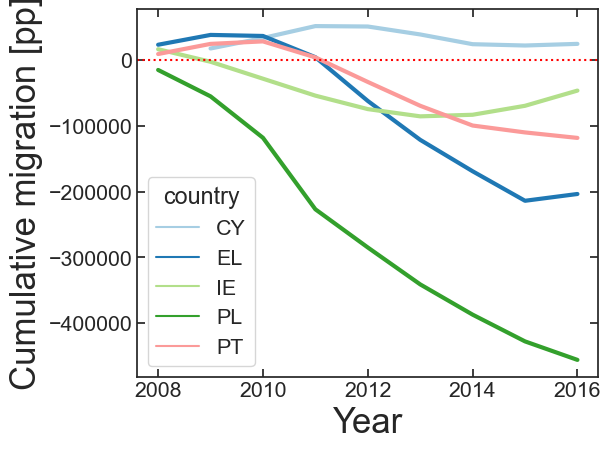

In [94]:
sns.lineplot(data=df_crisis, x="year", y="cumulative", hue="country", linewidth=3)
plt.axhline(0, color="red", linestyle=":")
plt.xlabel("Year")
plt.ylabel("Cumulative migration [pp]")
plt.tight_layout()
plt.show()